# introduction	
	•	When gradients (slopes) get very small (close to 0) as they are propagated backward through many layers.
	•	This makes weights update extremely slowly, so the network learns very little or not at all in earlier layers.

# Why it happens
	1.	Activation functions like sigmoid or tanh squash inputs into a small range:
	•	Sigmoid outputs between 0 and 1.
	•	Tanh outputs between -1 and 1.
	•	Their derivatives (slopes) are less than 1 and often very small.
	•	Multiplying many small derivatives across layers → exponential shrinking of gradients.
	2.	Deep networks amplify this effect since gradients keep multiplying through layers.

# Effects
	•	Earlier layers (closer to input) hardly get updated.
	•	Network may get stuck in poor local minima or converge extremely slowly.
	•	Leads to underfitting and poor performance.

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

using make_moon function to make a dataset of having two  half moon shape 

In [64]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)
df=pd.DataFrame(X,y,columns=["X","y"])

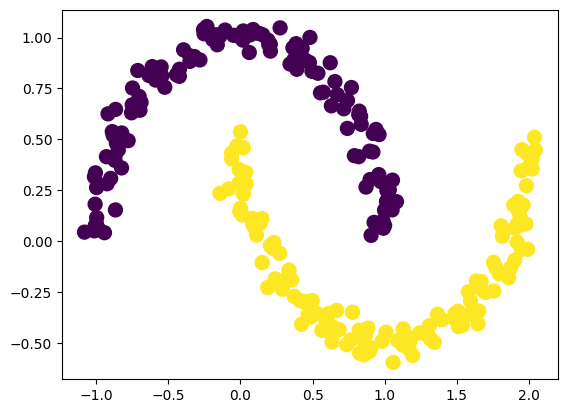

In [65]:

plt.scatter(df["X"], df["y"], c=y, s=100)
plt.show()

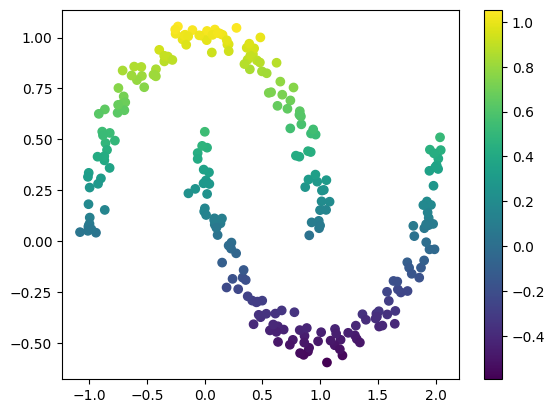

In [66]:
plt.scatter(df["X"], df["y"], c=df["y"], cmap="viridis")  
plt.colorbar()

# using less dense  network

In [67]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [68]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [69]:
model.get_weights()[0]

array([[ 0.52683026, -0.36143503,  0.41202348, -0.11676276, -0.36545095,
        -0.02455342, -0.62501705,  0.53746957, -0.47007442,  0.00376153],
       [-0.23699155,  0.00235736, -0.6265577 , -0.49384218, -0.5764462 ,
        -0.00749892, -0.14102334, -0.6142001 , -0.66251993,  0.25981814]],
      dtype=float32)

In [70]:
old_weights = model.get_weights()[0]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [72]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5250 - loss: 0.6923  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5100 - loss: 0.6917
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5100 - loss: 0.6914
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5100 - loss: 0.6910
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5100 - loss: 0.6905
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5100 - loss: 0.6901
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5100 - loss: 0.6897
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5100 - loss: 0.6893
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5100 - loss: 0.6889
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5100 - loss: 0.6883
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5100 - loss: 0.6877
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5100 - loss: 0.6873

In [73]:
new_weights = model.get_weights()[0]

In [74]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [75]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [76]:
gradient

array([[ -406.64893,   447.48944,  -419.25803,   437.74304,  -645.80585,
          530.6783 ,   369.57083,  -352.38913,  -718.4711 ,  -471.94125],
       [ 1058.3048 , -1007.03625,  1033.6489 ,  -893.88245,  1060.839  ,
        -1009.91626,  -970.53503,  1025.6732 ,  1127.713  ,   866.5853 ]],
      dtype=float32)

In [77]:
percent_change

array([[   77.18785 ,   123.809105,   101.75586 ,   374.89957 ,
          176.7148  ,  2161.3215  ,    59.129723,    65.56448 ,
          152.842   , 12546.524   ],
       [  446.55807 , 42718.754   ,   164.97267 ,   181.0057  ,
          184.0309  , 13467.49    ,   688.20886 ,   166.99335 ,
          170.21573 ,   333.53537 ]], dtype=float32)

# using the dense network
	•	but relu to minimize the  vanishing effect 

In [78]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [79]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [80]:

old_weights = model.get_weights()[0]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [82]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5100 - loss: 0.6931
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5450 - loss: 0.6894
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6300 - loss: 0.6866
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6950 - loss: 0.6830
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8100 - loss: 0.6779
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8200 - loss: 0.6710
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8350 - loss: 0.6609
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8500 - loss: 0.6468
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8500 - loss: 0.6261
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8400 - loss: 0.5944 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8400 - loss: 0.5563
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8450 - loss: 0.5146


In [83]:
new_weights = model.get_weights()[0]

In [84]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [85]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [86]:
gradient

array([[-210.3819  ,  -56.433468,   30.533073,  227.44678 ,   33.672005,
          35.955276,  368.59488 ,  -96.71948 , -122.025185,  169.2059  ],
       [ 163.12666 ,  -58.70831 ,   14.131099, -150.23679 ,   26.941597,
        -119.85373 , -388.33994 , -144.9545  ,  -58.724968,  199.26094 ]],
      dtype=float32)

In [87]:
percent_change

array([[ 51.354515 ,  25.993025 ,   5.0810256,  48.328663 ,   7.0136166,
          7.835969 ,  97.50198  ,  37.474426 ,  24.231281 , 340.08157  ],
       [ 38.90688  ,  10.704055 ,   3.1336074,  25.055296 ,   3.877121 ,
         28.484964 ,  65.90444  ,  28.199308 ,  14.77209  ,  53.691536 ]],
      dtype=float32)